# Bagging Classifier 

The bagging classifier, also known as bootstrap aggregating, is a type of ensemble learning algorithm that combines multiple decision tree models to improve the overall performance of the classification task. Bagging works by creating multiple subsets of the original training data set by randomly selecting observations with replacement, and training a separate decision tree model on each of these subsets.

During the prediction phase, each decision tree model produces its own classification result, and the final classification is determined by aggregating the results of all the individual models. This aggregation can be done by taking the majority vote, where the classification with the most votes is chosen as the final prediction.

In [4]:
# Importing the training and testing sets from the KNN file
import pickle

# Load the data from the file
with open('data.pkl', 'rb') as f:
    X_train, X_test, Y_train, Y_test = pickle.load(f)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report
from termcolor import colored

def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred, zero_division=True))

In [9]:
from sklearn.ensemble import BaggingClassifier

baggingKNN = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=20)
baggingKNN.fit(X_train, Y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=20)

In [13]:
Y_pred = baggingKNN.predict(X_test)

In [10]:
report(baggingKNN, X_train, Y_train)

Classification report for model BaggingClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

  High-Rated       0.92      0.87      0.89      5065
   Low-Rated       0.84      0.86      0.85      1071
Medium-Rated       0.96      0.98      0.97     22743

    accuracy                           0.95     28879
   macro avg       0.91      0.90      0.90     28879
weighted avg       0.95      0.95      0.95     28879



### Classification report - train set

##### Precision: 
*true positives : (true positives + false positives)*

* **High-Rated class** - 92% of the predicted High-Rated instances were actually High-Rated.
* **Medium-Rated class** - 96% of the predicted Medium-Rated instances were actually Medium-Rated.
* **Low-Rated class** - 84% of the predicted Low-Rated instances were actually Low-Rated.

##### Recall
*true positives : (true positives + false negatives)*

* **High-Rated class** - The model correctly identified 87% of the actual High-Rated instances.
* **Medium-Rated class** - The model correctly identified 98% of the actual Medium-Rated instances.
* **Low-Rated class** - The model correctly identified 86% of the actual Low-Rated instances.

##### F1-score
*harmonic mean of precision and recall*

* **High-Rated class** - 0.89
* **Medium-Rated class** - 0.97
* **Low-Rated class** - 0.85

##### Support
*the number of samples or instances of each class in the test dataset*

* **High-Rated class** - 5065
* **Medium-Rated class** - 22743
* **Low-Rated class** - 1071


### <u> Accuracy: 95% </u>

In [11]:
report(baggingKNN, X_test, Y_test, "test")

Classification report for model BaggingClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

  High-Rated       0.85      0.81      0.83      1764
   Low-Rated       0.74      0.81      0.77       336
Medium-Rated       0.95      0.96      0.95      7527

    accuracy                           0.92      9627
   macro avg       0.85      0.86      0.85      9627
weighted avg       0.92      0.92      0.92      9627



### Classification report - test set

##### Precision: 
*true positives : (true positives + false positives)*

* **High-Rated class** - 85% of the predicted High-Rated instances were actually High-Rated.
* **Medium-Rated class** - 95% of the predicted Medium-Rated instances were actually Medium-Rated.
* **Low-Rated class** - 74% of the predicted Low-Rated instances were actually Low-Rated.

##### Recall
*true positives : (true positives + false negatives)*

* **High-Rated class** - The model correctly identified 81% of the actual High-Rated instances.
* **Medium-Rated class** - The model correctly identified 96% of the actual Medium-Rated instances.
* **Low-Rated class** - The model correctly identified 81% of the actual Low-Rated instances.

##### F1-score
*harmonic mean of precision and recall*

* **High-Rated class** - 0.83
* **Medium-Rated class** - 0.95
* **Low-Rated class** - 0.77

##### Support
*the number of samples or instances of each class in the test dataset*

* **High-Rated class** - 1764
* **Medium-Rated class** - 7527
* **Low-Rated class** - 336


### <u> Accuracy: 92% </u>

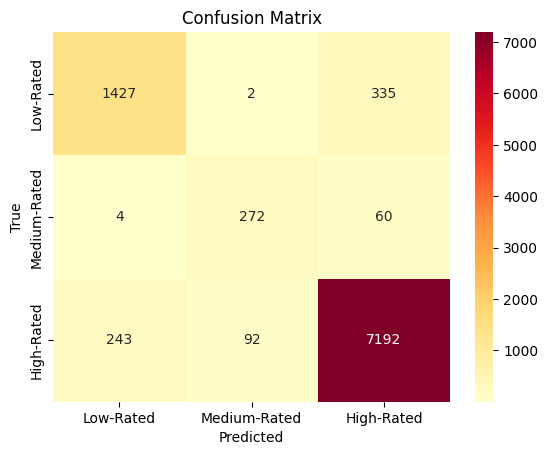

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Class labels
labels = ['Low-Rated', 'Medium-Rated', 'High-Rated']  

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
cm

array([[1427,    2,  335],
       [   4,  272,   60],
       [ 243,   92, 7192]], dtype=int64)

### Confusion matrix

##### For the Low-Rated class:
* 1427 samples were correctly predicted as Low-Rated
* 2 sample was predicted as Medium-Rated but was actually Low-Rated
* 335 samples were predicted as High-Rated but were actually Low-Rated

##### For the Medium-Rated class:
* 4 samples were predicted as Low-Rated but were actually Medium-Rated
* 272 samples were correctly predicted as Medium-Rated 
* 60 samples were predicted as High-Rated but were actually Medium-Rated 

##### For the High-Rated class:
* 243 samples were predicted as Low-Rated but were actually High-Rated
* 92 samples were predicted as Medium-Rated but were actually High-Rated
* 7192 samples were correctly predicted as High-Rated
